# Answers to Some Research Questions

In [1]:
import pandas as pd

In [16]:
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

In [35]:
def group_and_count(df, groupby_column, with_pct=False, with_avg=False):
    result = df.groupby(groupby_column).size().sort_values(ascending=False).reset_index().rename(columns={0: 'count'})
    if with_pct:
        result['count_pct'] = (result['count'] / result['count'].sum())*100
    if with_avg:
        result['count_avg'] = result['count'].mean()
    return result

## Read Data

In [4]:
df = pd.read_json('data/liar_dataset.json')

In [5]:
df.shape

(21026, 32)

In [6]:
df.head(5)

,author_name_slug,context,label,ruling_date,speaker_current_job,speaker_first_name,speaker_home_state,speaker_last_name,statement,statement_date,statement_id,statement_type,statement_type_description,label_as_nb,clean_context,statement_year,speaker_full_name,speakers_job_title_cleaned,CANDIDATE NAME,primary_votes_senate_2014,primary_votes_senate_2014_pct,primary_votes_house_2014,primary_votes_house_2014_pct,primary_votes_senate_2016,primary_votes_senate_2016_pct,primary_votes_house_2016,primary_votes_house_2016_pct,primary_votes_all_2012,primary_votes_all_2012_pct,speaker,speaker_tag,context_tag
0,meghan-ashford-grooms,in a Web site video,pants-fire,2010-01-12T15:52:21,,Barbara Ann,,Radnofsky,The attorney general requires that rape victims pay for the rape kit.,1.256170e+12,1.0,Claim,blog post,16.0,others,2009.0,"Radnofsky, Barbara Ann",,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,barbara-ann-radnofsky,PERSON,"[web, 163]"
1,jody-kyle,an interview on MSNBC,true,2007-10-03T00:00:00,author,Mike,Arkansas,Huckabee,Hes sued gun manufacturers. He was supportive of Brady. He was supportive of things like assault weapon bans.,1.190333e+12,100.0,Attack,<p>\r\n\tA criticism of a candidate.</p>\r\n,6.0,others,2007.0,"Huckabee, Mike",author,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,mike-huckabee,PERSON,"[interview, 219]"
10,sean-gorman,a radio show.,true,2015-09-29T00:00:00,author,Mike,Arkansas,Huckabee,"Six of the 10 richest counties in the United States surround Washington, D.C.",1.443053e+12,11356.0,Claim,blog post,6.0,tv,2015.0,"Huckabee, Mike",author,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,mike-huckabee,PERSON,"[show, 265]"
100,louis-jacobson,"an interview on Fox News' ""On the Record"" with Greta Van Susteren",pants-fire,2013-05-20T18:04:58,Congresswoman,Michele,Minnesota,Bachmann,"The IRS is going to be in charge of a huge national database on health care that will include Americans&rsquo; personal, intimate, most close-to-the-vest-secrets.",1.368576e+12,7802.0,Claim,blog post,16.0,fox,2013.0,"Bachmann, Michele",congressman,"Bachmann, Michele",None,NaN,None,NaN,None,NaN,None,NaN,14569,0.803452,michele-bachmann,PERSON,"[news, 478]"
1000,tom-kertscher,a radio ad,barely-true,2012-05-29T09:14:31,,,,National Rifle Association,"Says Tom Barrett voted to ban 15 different kinds of guns, even a lot of common deer rifles.",1.337126e+12,5984.0,Attack,<p>\r\n\tA criticism of a candidate.</p>\r\n,12.0,tv,2012.0,"National Rifle Association,",,None,None,NaN,None,NaN,None,NaN,None,NaN,None,None,national-rifle-association,ORGANIZATION,"[ad, 240]"


In [7]:
group_and_count(df, 'label')

,label,count
0,false,3039
1,half-true,3032
2,mostly-true,2910
3,barely-true,2645
4,true,2296
5,pants-fire,1609
6,full-flop,149
7,half-flip,69
8,no-flip,25


In [8]:
group_and_count(df, 'statement_type')

,statement_type,count
0,Claim,13851
1,Attack,1692
2,Flip,231


In [9]:
group_and_count(df, 'speaker_tag')

,speaker_tag,count
0,PERSON,18194
1,O,1837
2,ORGANIZATION,936
3,LOCATION,59


In [12]:
df['context_tag_clean'] = df.apply(lambda row: row['context_tag'][0] if row['context_tag'] else row['context_tag'], axis=1)

In [104]:
group_and_count(df, 'context_tag_clean')[:10]

,context_tag_clean,count
0,interview,1753
1,news,1282
2,campaign,1177
3,speech,1107
4,press,1017
5,debate,1010
6,ad,973
7,post,631
8,tweet,573
9,radio,315


In [102]:
group_and_count(df, 'speaker')[:10]

,speaker,count
0,nan-nan,5252
1,donald-trump,639
2,barack-obama,619
3,bloggers,422
4,hillary-clinton,300
5,mitt-romney,216
6,scott-walker,211
7,john-mccain,190
8,chain-email,180
9,rick-perry,175


In [103]:
group_and_count(df, ['speaker', 'speaker_tag'])[:10]

,speaker,speaker_tag,count
0,nan-nan,PERSON,5252
1,donald-trump,PERSON,639
2,barack-obama,PERSON,619
3,bloggers,O,422
4,hillary-clinton,PERSON,300
5,mitt-romney,PERSON,216
6,scott-walker,PERSON,211
7,john-mccain,PERSON,190
8,chain-email,O,180
9,rick-perry,PERSON,175


In [36]:
group_and_count(df[df['speaker'] == 'donald-trump'], 'label', with_pct=True)

,label,count,count_pct
0,false,211,33.020344
1,barely-true,135,21.126761
2,half-true,93,14.553991
3,pants-fire,92,14.397496
4,mostly-true,72,11.267606
5,true,29,4.538341
6,full-flop,7,1.095462


In [26]:
group_and_count(df[df['speaker'] == 'hillary-clinton'], 'label', with_pct=True)

,label,count,count_pct
0,mostly-true,76,25.333333
1,true,72,24.000000
2,half-true,69,23.000000
3,barely-true,41,13.666667
4,false,31,10.333333
5,pants-fire,7,2.333333
6,full-flop,3,1.000000
7,no-flip,1,0.333333


In [27]:
group_and_count(df[df['speaker'] == 'bloggers'], 'label', with_pct=True)

,label,count,count_pct
0,pants-fire,279,66.113744
1,false,87,20.616114
2,barely-true,26,6.161137
3,half-true,15,3.554502
4,mostly-true,10,2.369668
5,true,5,1.184834


## Number of lies per speaker

In [65]:
df1 = group_and_count(df, ['speaker', 'speaker_tag'])

In [66]:
df2 = group_and_count(df[df['label'] == 'false'], 'speaker')

In [69]:
# df1.join(df2, how='left', on='speaker', lsuffix='_1', rsuffix='_2')
df_false = pd.merge(df1, df2, on='speaker', suffixes=('_total', '_false'))
df_false.head(5)

,speaker,speaker_tag,count_total,count_false
0,donald-trump,PERSON,639,211
1,barack-obama,PERSON,619,71
2,bloggers,O,422,87
3,hillary-clinton,PERSON,300,31
4,mitt-romney,PERSON,216,32


In [96]:
df_false['false_pct'] = df_false.apply(lambda row: row['count_false']/row['count_total']*100, axis=1)
df_false = df_false.sort_values(by=['false_pct'], ascending=False)
df_false.head(5)

,speaker,speaker_tag,count_total,count_false,false_pct
1300,martin-shkreli,PERSON,1,1,100.0
1202,jeff-bridges,PERSON,1,1,100.0
1268,new-york-times-editorial-board,ORGANIZATION,1,1,100.0
1298,martina-white,PERSON,1,1,100.0
1297,marvin-pratt,PERSON,1,1,100.0


In [97]:
df_false[df_false['false_pct'] != 100].head(5)

,speaker,speaker_tag,count_total,count_false,false_pct
370,sarah-huckabee-sanders,PERSON,5,4,80.0
426,jon-runyan,PERSON,4,3,75.0
404,mitch-daniels,PERSON,4,3,75.0
417,monica-wehby,PERSON,4,3,75.0
412,nicholas-mattiello,PERSON,4,3,75.0


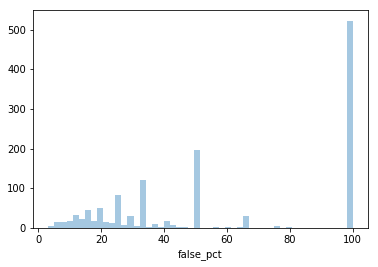

In [89]:
import seaborn as sns
sns.distplot(df_false['false_pct'], kde=False, bins=50);

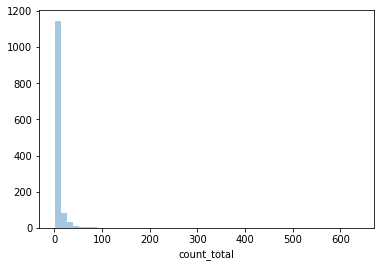

In [88]:
sns.distplot(df_false['count_total'], kde=False, bins=50);

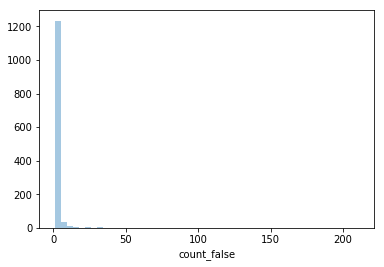

In [90]:
sns.distplot(df_false['count_false'], kde=False, bins=50);

In [101]:
df_false[df_false['false_pct'] == 100].sort_values(by=['count_total'], ascending=False).head(10)

,speaker,speaker_tag,count_total,count_false,false_pct
539,darrell-issa,PERSON,3,3,100.0
729,julaine-appling,PERSON,2,2,100.0
735,jeanine-pirro,PERSON,2,2,100.0
718,beaverton,LOCATION,2,2,100.0
661,new-century-times,O,2,2,100.0
664,bishop-thomas-tobin,PERSON,2,2,100.0
792,daily-caller,O,2,2,100.0
781,rod-monroe,PERSON,2,2,100.0
772,instagram-posts,O,2,2,100.0
763,internet-commenters,O,2,2,100.0


From this dataset information we can see that [Darrell Issa](https://en.wikipedia.org/wiki/Darrell_Issa) lied in 3 out of 3 statements he gave. This makes him an US polititian who proportionally gave the most number of false statements.

In [105]:
df_false[df_false['speaker']=='donald-trump']

,speaker,speaker_tag,count_total,count_false,false_pct
0,donald-trump,PERSON,639,211,33.020344


In [107]:
df_false[df_false['speaker']=='hillary-clinton']

,speaker,speaker_tag,count_total,count_false,false_pct
3,hillary-clinton,PERSON,300,31,10.333333


In [108]:
df_false[df_false['speaker']=='barack-obama']

,speaker,speaker_tag,count_total,count_false,false_pct
1,barack-obama,PERSON,619,71,11.470113


In [119]:
df_false.sort_values(by=['false_pct', 'count_total'], ascending=False)

,speaker,speaker_tag,count_total,count_false,false_pct
539,darrell-issa,PERSON,3,3,100.000000
661,new-century-times,O,2,2,100.000000
735,jeanine-pirro,PERSON,2,2,100.000000
718,beaverton,LOCATION,2,2,100.000000
664,bishop-thomas-tobin,PERSON,2,2,100.000000
792,daily-caller,O,2,2,100.000000
781,rod-monroe,PERSON,2,2,100.000000
772,instagram-posts,O,2,2,100.000000
763,internet-commenters,O,2,2,100.000000
748,ryan-zinke,PERSON,2,2,100.000000


From the table above we can see that [Bill Nelson](https://en.wikipedia.org/wiki/Bill_Nelson) is a politician that proportionally lied the least. Out of 32 statement collected in this dataset, only 1 was false.